In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("/home/zhaocq/桌面/tensorflow/mnist/raw/",one_hot=True)
sess = tf.InteractiveSession()
X = tf.placeholder(tf.float32,[None,784])
x_image = tf.reshape(X,[-1,28,28,1])


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/zhaocq/桌面/tensorflow/mnist/raw/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/zhaocq/桌面/tensorflow/mnist/raw/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /home/zhaocq/桌面/tensorflow/mnist/raw/t10k-images-idx3-ubyte.gz
Extracting /home/zhaocq/桌面/tensorflow/mnist/raw/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1],padding='SAME')
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
def deconv2d(x,w,shape):
    #w = tf.get_variable('w', [3, 3, shape[-1], x.get_shape()[-1]],
             # initializer=tf.random_normal_initializer(stddev=0.02))
    return tf.nn.conv2d_transpose(x, w ,output_shape=shape,strides=[1,2,2,1],padding='SAME')

w_enconv1 = tf.Variable(tf.truncated_normal([3,3,1,16],stddev=0.1)) #[5,5,1,32]表示卷积核尺寸5*5,1通道，32个不同卷积核
b_enconv1 = tf.Variable( tf.constant(0.1, shape=[16]))# bias_variable([32])
w_enconv2 = tf.Variable(tf.truncated_normal([3,3,16,8],stddev=0.1))
b_enconv2 = tf.Variable( tf.constant(0.1, shape=[8]))
w_enconv3 = tf.Variable(tf.truncated_normal([3,3,8,1],stddev=0.1))
b_enconv3 = tf.Variable( tf.constant(0.1, shape=[1]))
w_fc = tf.Variable(tf.random_normal([49,20], stddev=0.01))

w_defc = tf.Variable(tf.random_normal([20,49], stddev=0.01))#[5,5,1,32]表示卷积核尺寸5*5,1通道，32个不同卷积核
b_defc = tf.Variable( tf.constant(0.1, shape=[49]))
w_deconv2 = tf.Variable(tf.truncated_normal([3,3,64,1],stddev=0.1))
w_deconv3 = tf.Variable(tf.truncated_normal([3,3,1,64],stddev=0.1))


def encoder(x_image,w_enconv1,b_enconv1,w_enconv2,b_enconv2,w_enconv3,b_enconv3,w_fc):
    h_conv1 = tf.nn.relu(conv2d(x_image,w_enconv1) + b_enconv1)
    h_pool1 = max_pool_2x2(h_conv1)
    h_conv2 = tf.nn.relu(conv2d(h_pool1,w_enconv2) + b_enconv2)
    h_pool2 = max_pool_2x2(h_conv2)
    h_conv3 = tf.nn.relu(conv2d(h_pool2,w_enconv3) + b_enconv3)
    #conv_shape = h_pool3.get_shape().as_list()
    #nodes = conv_shape[1]*conv_shape[2]*conv_shape[3]            # 向量的长度为矩阵的长宽及深度的乘积
    h_f = tf.reshape(h_conv3,[-1,49])   # conv_shape[0]为一个batch中数据的个数
    h_fc = tf.nn.relu(tf.matmul(h_f, w_fc))
    return h_fc
def decoder(x,w_defc,b_defc,w_deconv2,w_deconv3):
    h_0 = tf.nn.relu(tf.add(tf.matmul(x, w_defc),b_defc))
    h_1 = tf.reshape(h_0,[-1,7,7,1])
    h_deconv1 = tf.nn.sigmoid(deconv2d(h_1,w_deconv2,[batch_size,14,14,64]))
    h_deconv2 = tf.nn.sigmoid(deconv2d(h_deconv1,w_deconv3,[batch_size,28,28,1]))
    return h_deconv2



In [3]:
learning_rate = 0.01
epochs = 100
batch_size = 200
display_step = 5
log_dir = './MNIST_LOG'
encoder_op = encoder(x_image,w_enconv1,b_enconv1,w_enconv2,b_enconv2,w_enconv3,b_enconv3,w_fc)
decoder_op = decoder(encoder_op,w_defc,b_defc,w_deconv2,w_deconv3)
y_pred = decoder_op
y_true = x_image
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.pow(y_true-y_pred, 2))
    tf.summary.scalar('loss',loss)
    
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)
merged = tf.summary.merge_all()
writer = tf.summary.FileWriter(log_dir ,sess.graph)

iter:0 /100   loss : 0.06907
iter:1 /100   loss : 0.05742
iter:2 /100   loss : 0.04816
iter:3 /100   loss : 0.05072
iter:4 /100   loss : 0.04759
iter:5 /100   loss : 0.0463
iter:6 /100   loss : 0.04163
iter:7 /100   loss : 0.0419
iter:8 /100   loss : 0.04286
iter:9 /100   loss : 0.04386
iter:10 /100   loss : 0.04322
iter:11 /100   loss : 0.04109
iter:12 /100   loss : 0.04051
iter:13 /100   loss : 0.04138
iter:14 /100   loss : 0.03982
iter:15 /100   loss : 0.04045
iter:16 /100   loss : 0.04051
iter:17 /100   loss : 0.04086
iter:18 /100   loss : 0.04122
iter:19 /100   loss : 0.04129
iter:20 /100   loss : 0.04104
iter:21 /100   loss : 0.04181
iter:22 /100   loss : 0.04152
iter:23 /100   loss : 0.04148
iter:24 /100   loss : 0.04006
iter:25 /100   loss : 0.0394
iter:26 /100   loss : 0.03915
iter:27 /100   loss : 0.03846
iter:28 /100   loss : 0.04008
iter:29 /100   loss : 0.03742
iter:30 /100   loss : 0.04055
iter:31 /100   loss : 0.03979
iter:32 /100   loss : 0.03797
iter:33 /100   loss : 0

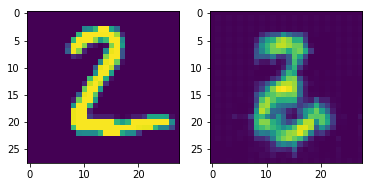

In [4]:


with tf.Session() as sess:
    tf.global_variables_initializer().run()
    #sess.run(init)
    count = 1
    total_batch = int(mnist.train.num_examples/batch_size)
    for epoch in range (epochs):
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c,_ = sess.run([optimizer,loss],feed_dict= {X: batch_xs})
            
        if epoch % 1 == 0:
            count += 1
            rs,los = sess.run([merged,loss],feed_dict= {X: batch_xs})
            writer.add_summary(rs,count)
            print('iter:{}'.format(epoch),'/{}'.format(epochs),'  loss : {:.4}'.format(los))
            #print("epoch:",'%04d'%(epoch+1),"cost = ","{:.9f}".format(c))
    print("over!")
    fh = mnist.test.images[:batch_size]
    encode_decoder = sess.run(y_pred, feed_dict={X: fh})
    plt.subplot(1,2,1);
    plt.imshow(np.reshape(fh[1],(28,28)))
    plt.subplot(1,2,2);
    plt.imshow(np.reshape(encode_decoder[1],(28,28)))